In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [21]:
def get_normalize_data(data, scaled = 'min_max'):
    # NORMALIZANDO OS DADOS 
    if scaled == 'max':
        for column in data.columns: 
            data[column] = data[column]  / data[column].abs().max() 
    else:    
        for column in data.columns: 
            data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())     


def split_train_data(data, predictive_label, apply_smote = True):

    X = data.drop("conformity_class", axis=1)
    y = data[predictive_label]
    
    if apply_smote:
        # SMOTE
        smote = SMOTE(random_state=32)
        X, y = smote.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=999
    )
    
    return X_train, X_test, y_train, y_test


def get_lazy_classifier_result(X_train, X_test, y_train, y_test):
    # Classifier
    clf = LazyClassifier(verbose=0, ignore_warnings=True)
    clf_models, clf_predictions = clf.fit(X_train, X_test, y_train, y_test)

    # Regressor
    reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
    reg_models, reg_predictions = reg.fit(X_train, X_test, y_train, y_test)

    return clf_models, clf_predictions, reg_models, reg_predictions

# Load synthetic data

array([[<AxesSubplot:xlabel='pressure', ylabel='pressure'>,
        <AxesSubplot:xlabel='iron', ylabel='pressure'>,
        <AxesSubplot:xlabel='copper', ylabel='pressure'>,
        <AxesSubplot:xlabel='hardness', ylabel='pressure'>,
        <AxesSubplot:xlabel='silica', ylabel='pressure'>,
        <AxesSubplot:xlabel='alkalinity', ylabel='pressure'>,
        <AxesSubplot:xlabel='conductance', ylabel='pressure'>],
       [<AxesSubplot:xlabel='pressure', ylabel='iron'>,
        <AxesSubplot:xlabel='iron', ylabel='iron'>,
        <AxesSubplot:xlabel='copper', ylabel='iron'>,
        <AxesSubplot:xlabel='hardness', ylabel='iron'>,
        <AxesSubplot:xlabel='silica', ylabel='iron'>,
        <AxesSubplot:xlabel='alkalinity', ylabel='iron'>,
        <AxesSubplot:xlabel='conductance', ylabel='iron'>],
       [<AxesSubplot:xlabel='pressure', ylabel='copper'>,
        <AxesSubplot:xlabel='iron', ylabel='copper'>,
        <AxesSubplot:xlabel='copper', ylabel='copper'>,
        <AxesSubplot:xla

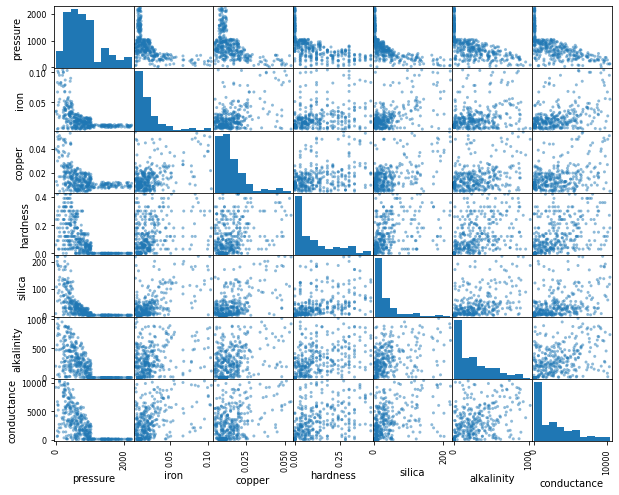

In [27]:
# Visualize the proportion of borrowers
load_data = pd.read_csv("synthetic_conformity_data.csv")

load_data["conformity_class"] = np.where(
    load_data["conformity_class"] == "conforming", 1, 0
)

predictive_label = "conformity_class"

attributes = list(load_data.drop("conformity_class", axis=1).columns)
pd.plotting.scatter_matrix(load_data[attributes], figsize=(10, 8))

AttributeError: 'NoneType' object has no attribute 'plot'

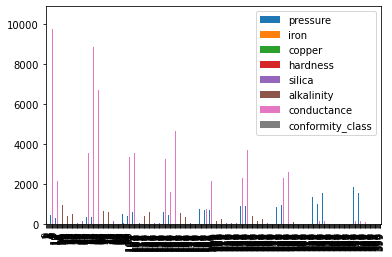

In [28]:
# Synthetic data
load_data.plot(kind = 'bar')

# Synthetic normalized data
get_normalize_data(load_data, scaled = 'max').plot(kind = 'bar')
get_normalize_data(load_data, scaled = 'min_max').plot(kind = 'bar')

In [ ]:
# TESTE 1: Synthetic data

X_train, X_test, y_train, y_test = split_train_data(
    load_data, predictive_label, apply_smote=False
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

clf_models, reg_models

In [ ]:
# TESTE 2: Synthetic data with SMOTE function

X_train, X_test, y_train, y_test = split_train_data(
    load_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

clf_models, reg_models

In [ ]:
# TESTE 3: Synthetic normalized data (max_scaled) without SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=False
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

clf_models, reg_models

In [ ]:
# TESTE 4: Synthetic normalized data (max_scaled) with SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

clf_models, reg_models

In [ ]:
# TESTE 5: Synthetic normalized (min_max_scaled) data without SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

clf_models, reg_models

In [ ]:
# TESTE 6: Synthetic normalized (min_max_scaled) data with SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'min_max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

clf_models, reg_models